# Getting data from the web - APIs

### HTTP requests and responses
#### Current weather in Dunedin

In [15]:
import requests

#An API to find out the current weather in Dunedin
r = requests.get('http://api.openweathermap.org/data/2.5/weather?q=Dunedin,nz&appid=f6b6fecf2c4292d8d19d201e57667588&mode=json')
print(r.json())

{'coord': {'lon': 170.5, 'lat': -45.87}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 281.115, 'pressure': 976.58, 'humidity': 79, 'temp_min': 281.115, 'temp_max': 281.115, 'sea_level': 1016.61, 'grnd_level': 976.58}, 'wind': {'speed': 0.31, 'deg': 333.504}, 'clouds': {'all': 24}, 'dt': 1537437097, 'sys': {'message': 0.0039, 'country': 'NZ', 'sunrise': 1537381885, 'sunset': 1537425140}, 'id': 2191562, 'name': 'Dunedin', 'cod': 200}


#### Apple stock prices over the last 5 years

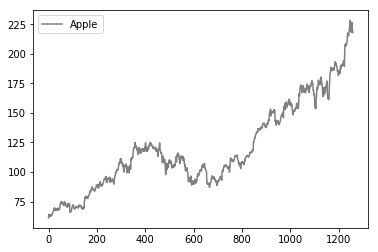

In [16]:
r = requests.get('https://api.iextrading.com/1.0//stock/aapl/chart/5y')
r.json()

#Then we can show this in a graph
responseApple = requests.get('https://api.iextrading.com/1.0//stock/aapl/chart/5y')

priceApple = []
for a in responseApple.json()[:]:
    priceApple.append(a['close'])
plt.plot(priceApple,c='grey',label='Apple') 
leg = plt.legend(loc='best')
plt.show()

#### Twitter API

In [28]:
!pip install python-twitter
!pip install ipykernel

import twitter
#use your own API credentials here

api = twitter.Api(consumer_key="VVOrgaCXVIvPfeby0on5ERHjB",
                  consumer_secret="5QNjO9U1PAVSf41FELmN8rvc0aQ1OtlgGdJXZ5vjoEPuMEoohT",
                      access_token_key="982053759613222912-VcKCtgM5T3DNSi1cZrY990cFePQCJkB",
                  access_token_secret="8jca8pKyJdaJTDAZfHGaiDml3ErU7tXcvzo9JA55yGz48")

import pandas as pd
## get the user timeline with screen_name = '@NASA'
twitter_statuses = api.GetUserTimeline(screen_name = '@NASA')

## create a data frame
pdSeriesList = [pd.Series(t.AsDict()) for t in twitter_statuses]

## then create the data frame
data = pd.DataFrame(pdSeriesList)

#let's just print the top 4 for illustration purposes
data.head(4)

## filter tweets with enough retweet_count
maybe_interesting = data[data.retweet_count>20]

## get the text of these tweets
tweet_text = maybe_interesting.text

## print them out
text = tweet_text.values

for t in text:
    print('######')
    print(t)
    
## filter tweets from a certain date that contain the word 'space', and let's limit the number of objects back to just 5
results = api.GetSearch(raw_query="q=Space&since=2016-09-19&from=NASA&count=3")
print('Search results for space: \n')
for r in results:
    print(r.text,"\n")
    
    





You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


######
The effects of living &amp; working in microgravity create changes in the human body. After 6 months spent in space, th… https://t.co/ZwgAccnnGB
######
Behold! The Earth's ultraviolet atomic oxygen emissions, seen here in the first observations of Earth’s upper atmos… https://t.co/mBYwpu337e
######
Our @NASAGlenn facility develops technologies to advance our space exploration program, including:

✔Hybrid-electri… https://t.co/3y4rUhDLvI
######
RT @JimBridenstine: Exciting News! I’m doing a LIVE Watch this Space show next Thursday on @NASA TV with our latest class of astronaut cand…
######
L.A. — you're so hot…at least in spots. Our #ECOSTRESS mission captured new imagery of variations in surface temper… https://t.co/djYwcQoxMw
######
RT @NASA_TESS: The @NASA_TESS team is excited to announce the mission's first candidate  planet -- a super-Earth around the bright star Pi…
######
RT @WomenNASA: “It’s an honor to lead Marshall Space Flight Center as we push the boundaries of human 